In [17]:
# Data pre-processing
import pandas as pd
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import openpyxl

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

#Data Analysis
import sklearn
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Reading raw data

In [18]:
with open('football.txt', 'w', encoding='utf-8', errors='ignore') as file:
    pd.read_excel('2021-06-23_Dataset_Fifa_19.xlsx').to_string(file, index=False)

Converting raw data to dataframe

In [19]:
football= pd.read_csv('football.txt')

#Displaying head part
football.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause Unnamed: 1
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M ...
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M ...
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M ...
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M ...
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M ...


Dataframe Dimensions

In [20]:
football.shape

(18207, 89)

Dataframe columns

In [21]:
football.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

checking for missing values

In [22]:
pd.isna(football.columns).sum()

#as we see sum is 0, there are no missing values in our dataset

0

As we see column named 'Unnamed: 0' is index number, we can remove it

In [28]:
#football=football.drop(columns=['Unnamed: 0'])
football.head

<bound method NDFrame.head of            ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               .

Corelation between properties we have

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

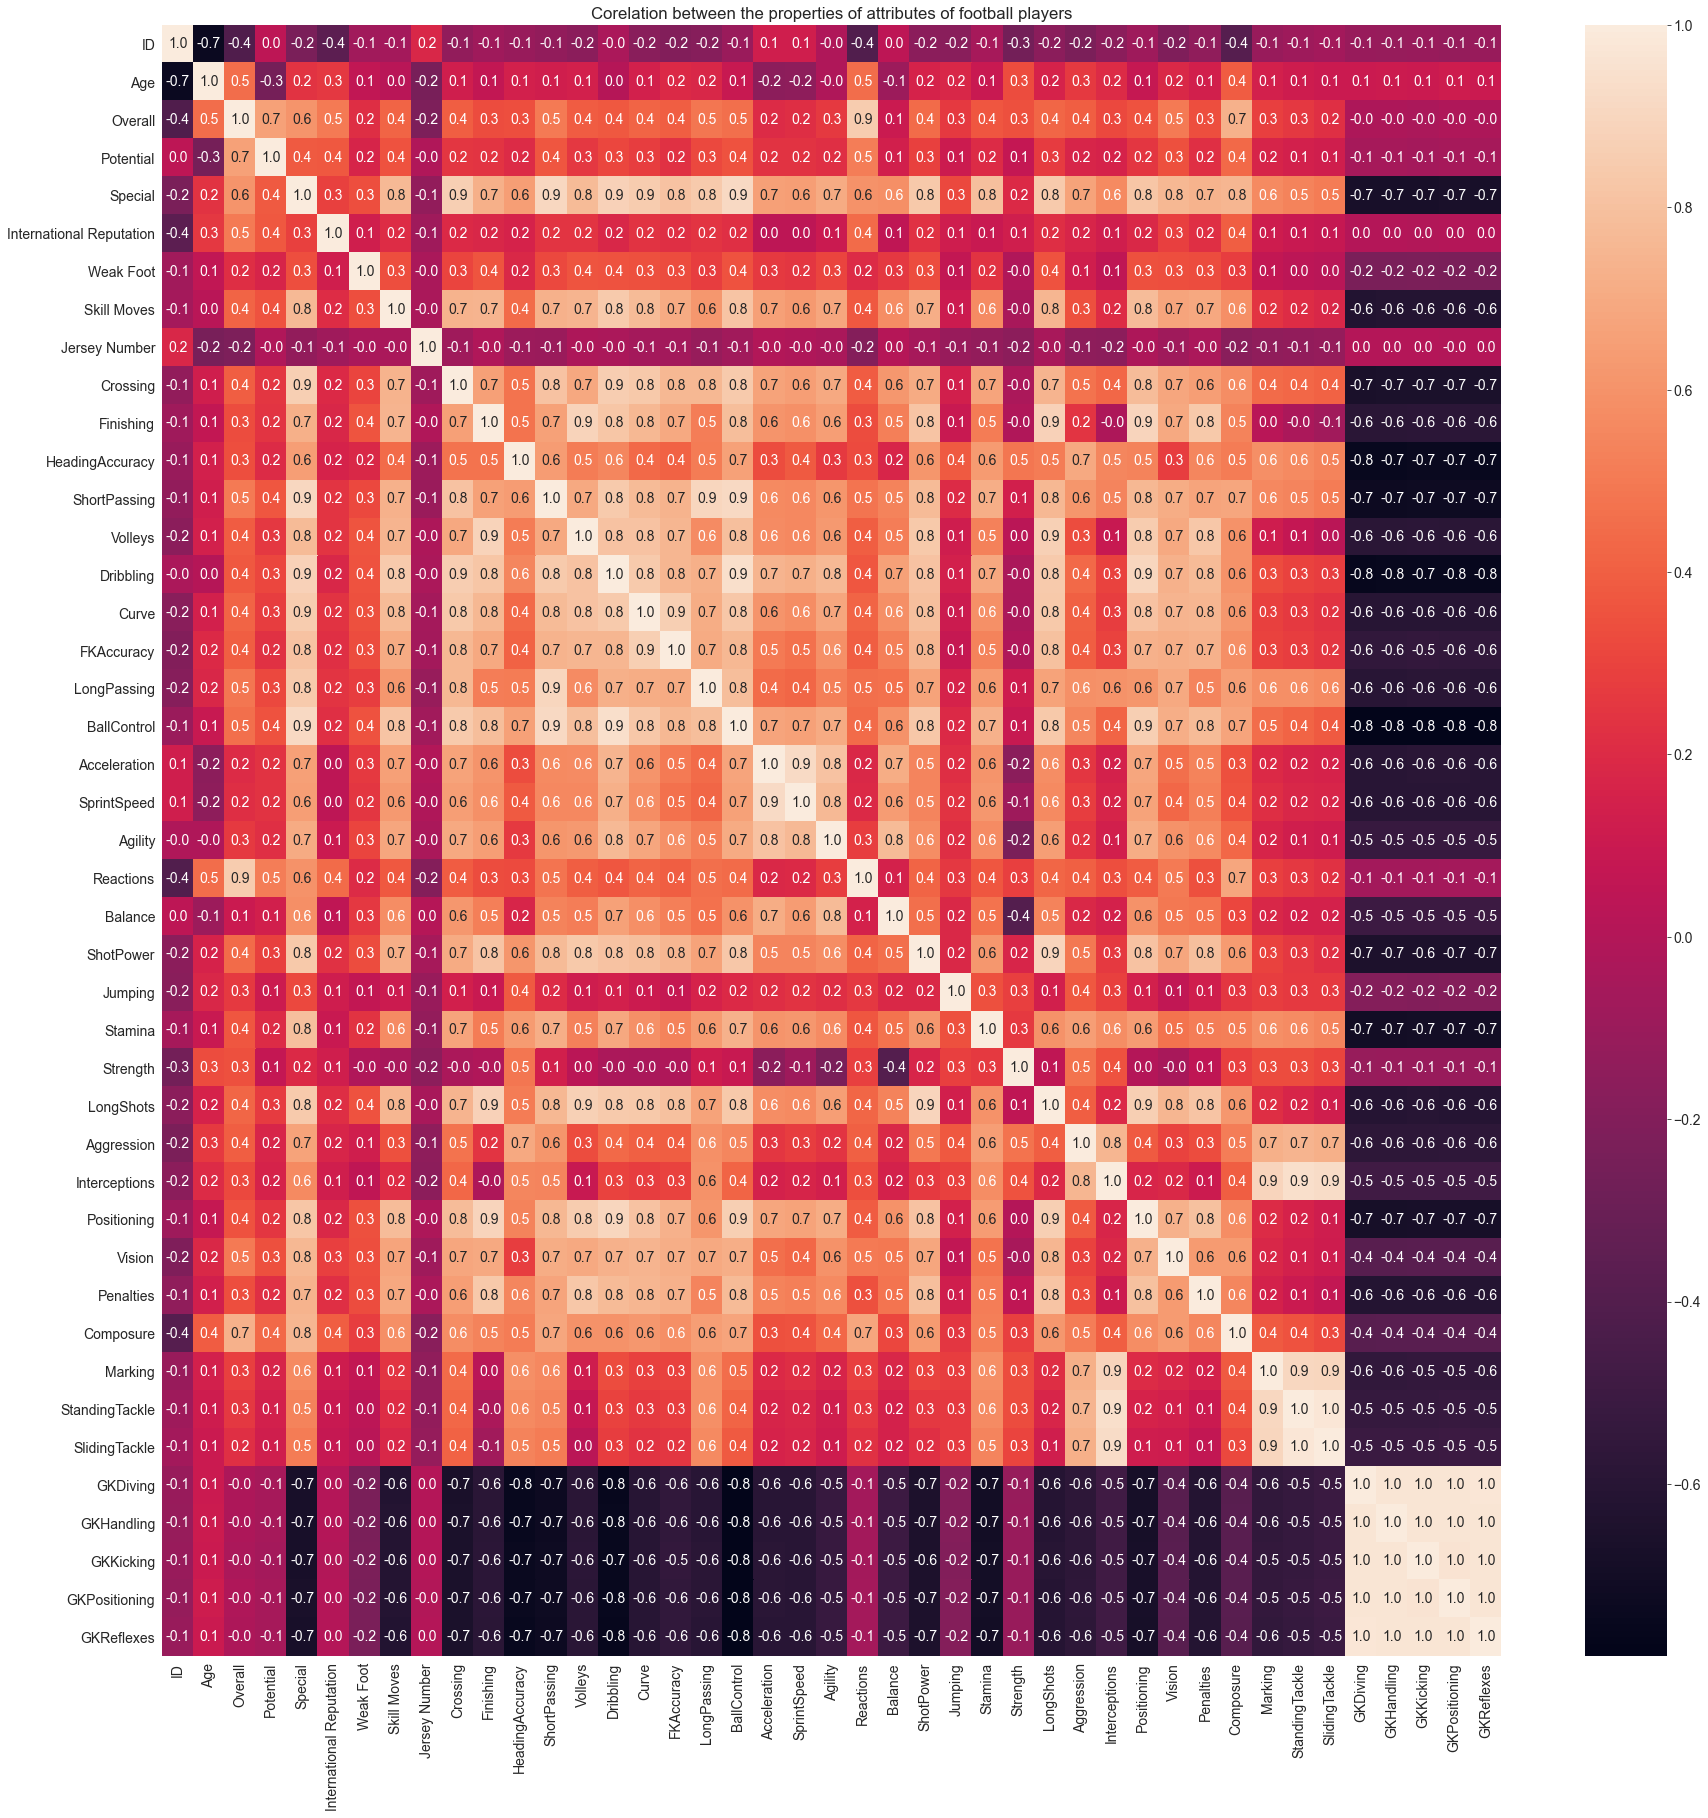

In [25]:

plt.figure(figsize = (30,30))
sns.heatmap(football.corr(), annot = True, fmt = '.1f')
plt.title("Corelation between the properties of attributes of football players")
plt.show()

In [30]:
#based on correlation above we can say that goal keeper is having more variations when,
#compared to other players(non-goalkeepers)

top 5 countries in FIFA-19

In [42]:
per_nation = football["Nationality"].value_counts()
per_nation = per_nation.reset_index()
per_nation.columns= ["Nations","Counts"]
per_nation.head()

,Nations,Counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914


In [46]:
fig = px.bar(per_nation, y='Counts', x='Nations', text='Nations')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [31]:
Football = football[['ID','Name','Age','Overall','Club','Value','Preferred Foot','Weak Foot','Position','Height','Weight','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing',
                     'BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
                     'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]

In [ ]:
Football.head()

# UseCase1:Which club is likely to concede the fewest goals during a season?

In [ ]:
Football.info()

In [ ]:
Football1 = Football[Football.isnull().sum(axis=1) < 20]

In [ ]:
Footbal= Football1.dropna(axis=0, subset=['Club'])

In [ ]:
Footbal.head()

In [ ]:
Clubs = Footbal[['Name','Overall','Club','Position']]

In [ ]:
DefensiveSkills = Footbal['HeadingAccuracy'] + Footbal['ShortPassing'] + Footbal['LongPassing'] + Footbal['Volleys'] + Footbal['BallControl']
+ Footbal['Marking'] + Footbal['StandingTackle'] + Footbal['SlidingTackle']
Clubs['DefensiveSkills'] = DefensiveSkills

In [ ]:
PhysicalnMental = Footbal['Acceleration'] + Footbal['SprintSpeed'] + Footbal['Agility'] + Footbal['Reactions'] + Footbal['Balance'] + Footbal['ShotPower'] + Footbal['Jumping'] + Footbal['Stamina'] + Footbal['Strength'] + Footbal['LongShots'] + Footbal['Aggression'] + Footbal['Interceptions'] + Footbal['Positioning'] + Footbal['Vision'] + Footbal['Penalties'] + Footbal['Composure']
Clubs['FitnessScore'] = PhysicalnMental

In [ ]:
GoalKeeper = Footbal['GKDiving'] + Footbal['GKHandling'] + Footbal['GKKicking'] + Footbal['GKPositioning'] + Footbal['GKReflexes']
Clubs['GoalKeeperSkills'] = GoalKeeper

In [ ]:
Clubs 

In [ ]:
Club1 = Clubs[Clubs['Position'].isin(['GK','SW','FB','LWB','RWB','WB','LDM','RDM','CDM','LB','LCB','CB','RB','RCB','DM'])]

In [ ]:
Club1

In [ ]:
c1 = Club1.sort_values(by='Overall', ascending=False).head(10)

In [ ]:
fig = go.Figure(data=[
    go.Scatter(name='Overall Rating', x=c1['Name'], y=c1['Overall'],hovertext=c1['Club']),
    
])
fig.show()

In [ ]:

c2=Club1.sort_values(by='DefensiveSkills', ascending=False).head(10)

In [ ]:
fig = go.Figure(data=[
    go.Scatter(name='Defensive Skills Rating', x=c2['Name'], y=c2['DefensiveSkills'],hovertext=c2['Club'])
    
])
fig.show()

In [ ]:
c3=Club1.sort_values(by='GoalKeeperSkills', ascending=False).head(10)

In [ ]:
fig = go.Figure(data=[
    go.Scatter(name='Goal Keeper Skills Rating', x=c3['Name'], y=c3['GoalKeeperSkills'],hovertext=c3['Club'])
])
fig.show()

In [ ]:
Club2 = Club1.groupby(['Club'])['Overall','DefensiveSkills','FitnessScore','GoalKeeperSkills'].sum().reset_index()

In [ ]:
Club2

In [ ]:
Club2['OverallDefenseScore'] = Club2['DefensiveSkills'] + Club2['GoalKeeperSkills']

In [ ]:
Club3 = Club2.sort_values('OverallDefenseScore', ascending=False).head(10)
Club3

In [ ]:
Club4 = Club2.sort_values('Overall', ascending=False).head(10)
Club4

In [ ]:
# Create figure
fig = go.Figure(data=[
    go.Bar(name='Overall Skills Rating', x=Club3['Club'], y=Club3['Overall'],hovertext=Club3['FitnessScore']),
    go.Bar(name='Defensive Score Skills Rating', x=Club3['Club'], y=Club3['DefensiveSkills'],hovertext=Club3['FitnessScore']),
    go.Bar(name='Goal Keeper Skills Rating', x=Club3['Club'], y=Club3['GoalKeeperSkills'],hovertext=Club3['FitnessScore'])
])

# Set templates
fig.update_layout(template="ggplot2")

fig.show()

In [ ]:
Club11 = Club1.loc[Club1['Club'] == 'Manchester City']
Club11

In [ ]:
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club11['Overall'], y=Club11['DefensiveSkills'],hovertext=Club11['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="undefined.jpg",
            xref="x",
            yref="y",
            x=50,
            y=500,
            sizex=50,
            sizey=400,
#             sizing="stretch",
            opacity=0.5,
            layer="below"))

In [ ]:
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club11['Overall'], y=Club11['GoalKeeperSkills'],hovertext=Club11['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="undefined.jpg",
            xref="x",
            yref="y",
            x=52,
            y=500,
            sizex=39,
            sizey=500,
#             sizing="stretch",
            opacity=0.5,
            layer="below"))

In [ ]:
Club12 = Club1.loc[Club1['Club'] == 'Leicester City']
Club12

In [ ]:
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club12['Overall'], y=Club12['DefensiveSkills'],hovertext=Club12['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="Leicester.jpg",
            xref="x",
            yref="y",
            x=60,
            y=500,
            sizex=50,
            sizey=500,
#             sizing="stretch",
            opacity=0.5,
            layer="below"))

In [ ]:
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club12['Overall'], y=Club12['GoalKeeperSkills'],hovertext=Club12['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="Leicester.jpg",
            xref="x",
            yref="y",
            x=62,
            y=500,
            sizex=50,
            sizey=500,
#             sizing="stretch",
            opacity=0.5,
            layer="below"))

In [ ]:
Club13 = Club1.loc[Club1['Club'] == 'Everton']
Club13

In [ ]:
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club13['Overall'], y=Club13['DefensiveSkills'],hovertext=Club13['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="teahub.png",
            xref="x",
            yref="y",
            x=50,
            y=500,
            sizex=500,
            sizey=500,
#             sizing="stretch",
            opacity=0.5,
            layer="below"))

In [ ]:
fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club13['Overall'], y=Club13['GoalKeeperSkills'],hovertext=Club13['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="teahub.png",
            xref="x",
            yref="y",
            x=56,
            y=500,
            sizex=50,
            sizey=500,
#             sizing="stretch",
            opacity=0.5,
            layer="below"))

# UseCase 2: What are the main differences between (1) players with the position “ST” (forward), (2) players with the position “CDM” (center defensive midfielder), and (3) players with the position “GK” (goalkeeper)?

In [ ]:
Footbal

In [ ]:
Positions = Footbal[['Name','Position','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Marking','StandingTackle','SlidingTackle']]

In [ ]:
PhysicalnMental = Footbal['Acceleration'] + Footbal['SprintSpeed'] + Footbal['Agility'] + Footbal['Reactions'] + Footbal['Balance'] + Footbal['ShotPower'] + Footbal['Jumping'] + Footbal['Stamina'] + Footbal['Strength'] + Footbal['LongShots'] + Footbal['Aggression'] + Footbal['Interceptions'] + Footbal['Positioning'] + Footbal['Vision'] + Footbal['Penalties'] + Footbal['Composure']
Positions['FitnessScore'] = PhysicalnMental

In [ ]:
GoalKeeper = Footbal['GKDiving'] + Footbal['GKHandling'] + Footbal['GKKicking'] + Footbal['GKPositioning'] + Footbal['GKReflexes']
Positions['GoalKeeperSkills'] = GoalKeeper

In [ ]:
Position = Positions[Positions['Position'].isin(['GK','ST','CDM'])]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Position.Position = le.fit_transform(Position.Position)

In [ ]:
x = Position.iloc[:,2:17]
y = Position.iloc[:,1:2]


In [ ]:
x

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3315508,random_state=1)

In [ ]:
sc_x = StandardScaler()
x_train1 = sc_x.fit_transform(x_train)
x_test1 = sc_x.transform(x_test)
x_train1

In [ ]:
classifier= neighbors.KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(x_train1,y_train)
print(classifier)

In [ ]:
y_pred = classifier.predict(x_test1)
first_pred = metrics.accuracy_score(y_test, y_pred)*100 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
classifier1= neighbors.KNeighborsClassifier(n_neighbors=5,p=2)
classes=['Central Defensive Midfielder','Goal Keeper','Striker']
visualizer = ClassificationReport(classifier1, classes=classes, support=True)

visualizer.fit(x_train1, y_train)  # Fit the visualizer and the model
visualizer.score(x_test1, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [ ]:
y_test

In [ ]:
x_test

In [ ]:

x_test['Predicted_position'] = pd.Series(y_pred, index=x_test.index)
x_test['Actuaal Position'] = y_test

In [ ]:
x_test.head()

In [ ]:

x_test.loc[x_test['Predicted_position'] == 0, 'Predicted_position'] = 'Central Defensive Midfielder'
x_test.loc[x_test['Predicted_position'] == 1, 'Predicted_position'] = 'Striker'
x_test.loc[x_test['Predicted_position'] == 2, 'Predicted_position'] = 'Goal Keeper'

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x_test, x='GoalKeeperSkills', y='FitnessScore', z='Finishing',
              color='Predicted_position')
fig.show()

In [ ]:
fig = px.scatter_3d(x_test, x='Marking', y='StandingTackle', z='SlidingTackle',
              color='Predicted_position')
fig.show()